# 📉 Dimensionality Reduction for Visualization and Analysis

We reduce the dimensionality of the single-cell data using PCA, t-SNE, and UMAP. This helps uncover biological structure, enables visualization, and prepares the data for clustering and trajectory inference.


In [ ]:
import scanpy as sc
import numpy as np

# Load the dataset with feature selection applied
adata = sc.read("../../data/breast_cancer_feature_selection.h5ad")

# Use shifted log-normalized data as input
adata.X = adata.layers["log1p_norm"]


## 🔹 Principal Component Analysis (PCA)

We run PCA on the top 4000 highly deviant genes selected previously. The top components capture most of the variance and serve as input for other embeddings like UMAP and t-SNE.


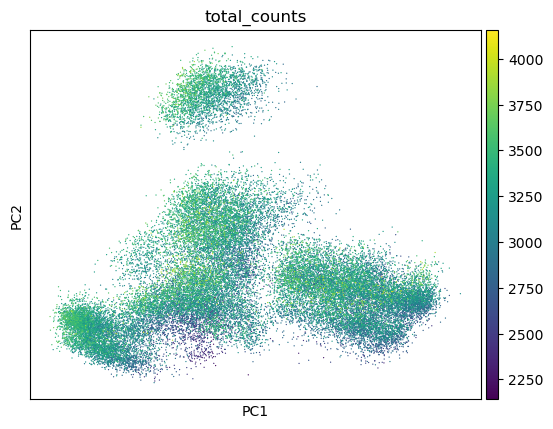

In [3]:
import numpy as np
# Use "highly_deviant" genes as scanpy's "highly_variable"
adata.var["highly_variable"] = adata.var["highly_deviant"]

# Run PCA
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

adata.obs["total_counts"] = np.ravel(adata.X.sum(axis=1))
sc.pl.pca_scatter(adata, color="total_counts")


## 🔹 t-SNE Projection

We apply t-distributed Stochastic Neighbor Embedding (t-SNE) to visualize the local structure of the data in 2D.


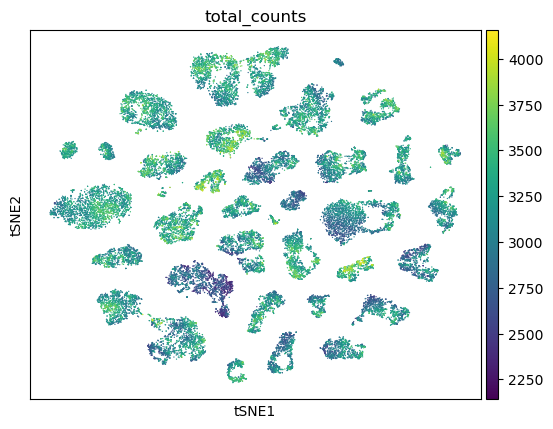

In [4]:
sc.tl.tsne(adata, use_rep="X_pca")
sc.pl.tsne(adata, color="total_counts")


## 🔹 UMAP Projection

UMAP is used to capture both local and global data structure. It often produces more interpretable clusters than t-SNE.


/home/guests3/gba/.conda/envs/tese-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


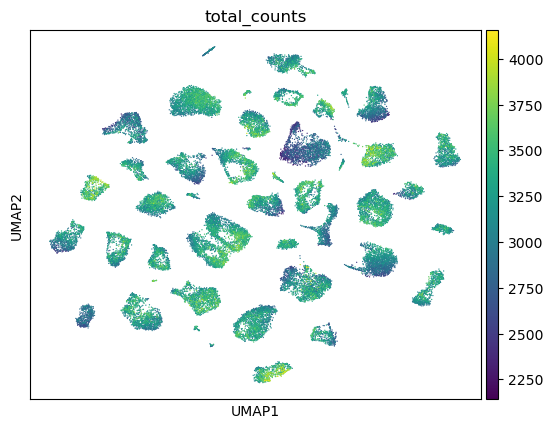

In [5]:
# Build neighborhood graph and run UMAP
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="total_counts")


## 🔍 Visualize Quality Control Metrics in UMAP

To verify that technical effects don’t dominate our data structure, we overlay total counts and (if available) mitochondrial content and doublet scores.


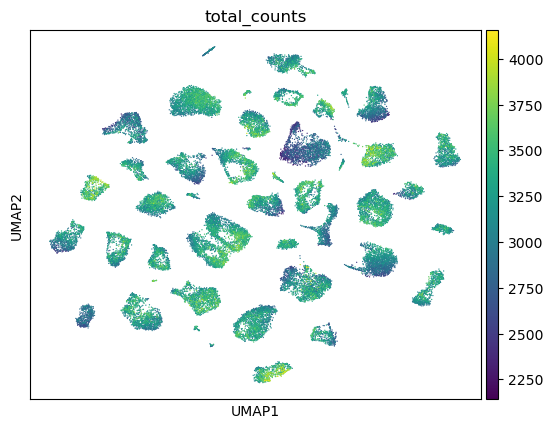

In [6]:
qc_metrics = ["total_counts"]
# Optional: include these if you computed them earlier
if "pct_counts_mt" in adata.obs.columns:
    qc_metrics.append("pct_counts_mt")
if "scDblFinder_score" in adata.obs.columns:
    qc_metrics.append("scDblFinder_score")
if "scDblFinder_class" in adata.obs.columns:
    qc_metrics.append("scDblFinder_class")

sc.pl.umap(adata, color=qc_metrics)


## 💾 Save Final Embedded Dataset


In [7]:
adata.write("../../data/breast_cancer_dimred.h5ad")
print("✅ Saved to 'breast_cancer_dimred.h5ad'")


✅ Saved to 'breast_cancer_dimred.h5ad'


### Dimensionality Reduction
We applied dimensionality reduction using PCA, t-SNE, and UMAP. PCA was computed on the top 4000 highly deviant genes using a shifted log-normalized count matrix. UMAP and t-SNE were computed based on PCA. These low-dimensional embeddings are used for visualization and clustering. Quality control metrics were overlaid to confirm that technical artifacts do not dominate the biological structure.
